In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [228]:
df=pd.read_csv("churn_prediction.csv")

In [229]:
df.shape

(28382, 21)

In [230]:
df.head(10)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
5,7,263,42,Female,0.0,self_employed,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
6,8,5922,72,Male,0.0,retired,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
7,9,1145,46,Male,0.0,self_employed,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0
8,10,2132,31,Male,0.0,salaried,1096.0,2,4110,19.0,...,1355.86,1702.44,1126.13,714.51,121.09,714.51,359.44,1183.45,1857.42,0
9,11,3379,40,Male,3.0,self_employed,1020.0,2,38,0.0,...,4244.38,2168.53,1864.33,6912.29,4206.13,1887.30,1348.85,1823.16,2416.69,0


In [231]:
#univariate analysis

In [232]:
df.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [233]:
df.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,25159.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2364.336446,48.208336,0.347236,796.109576,2.225530,925.975019,69.997814,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,0.997661,432.872102,0.660443,937.799129,86.341098,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,0.000000,409.000000,2.000000,176.000000,11.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,0.000000,834.000000,2.000000,572.000000,30.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,95.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,12899.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,365.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


In [234]:
df.describe(include='all')

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,27857,25919.000000,28302,27579.000000,28382.000000,28382.000000,25159.000000,...,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
unique,NaN,NaN,NaN,2,NaN,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Male,NaN,self_employed,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,16548,NaN,17476,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15143.508667,2364.336446,48.208336,NaN,0.347236,NaN,796.109576,2.225530,925.975019,69.997814,...,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,1610.124506,17.807163,NaN,0.997661,NaN,432.872102,0.660443,937.799129,86.341098,...,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,180.000000,1.000000,NaN,0.000000,NaN,0.000000,1.000000,1.000000,0.000000,...,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1121.000000,36.000000,NaN,0.000000,NaN,409.000000,2.000000,176.000000,11.000000,...,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074408e+03,0.000000
50%,15150.500000,2018.000000,46.000000,NaN,0.000000,NaN,834.000000,2.000000,572.000000,30.000000,...,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,3176.000000,60.000000,NaN,0.000000,NaN,1096.000000,3.000000,1440.000000,95.000000,...,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000


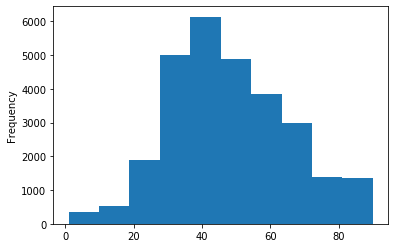

In [235]:
df['age'].plot.hist()

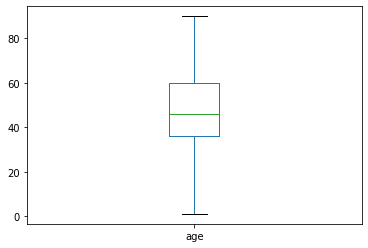

In [236]:
df['age'].plot.box()

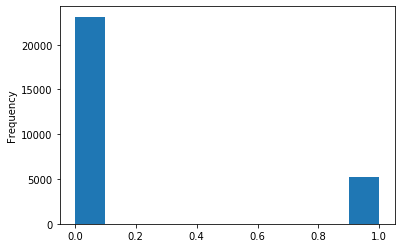

In [237]:
df['churn'].plot.hist()

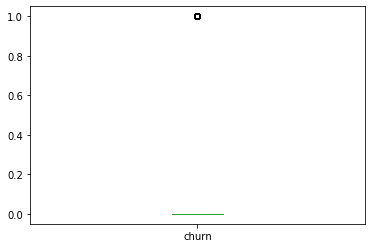

In [238]:
df['churn'].plot.box()

In [239]:
df['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

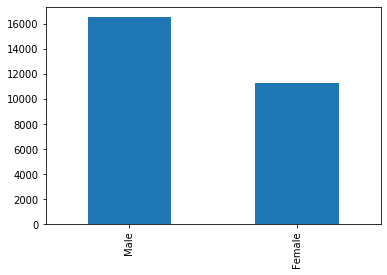

In [240]:
df['gender'].value_counts().plot.bar()

In [241]:
#Bivariate analysis

In [242]:
df['average_monthly_balance_prevQ2'].corr(df['age'])

0.059607034308748266

In [243]:
df['current_month_credit'].corr(df['current_month_debit'])

0.9370206798008276

In [244]:
df['current_month_balance'].corr(df['previous_month_balance'])

0.963276245647484

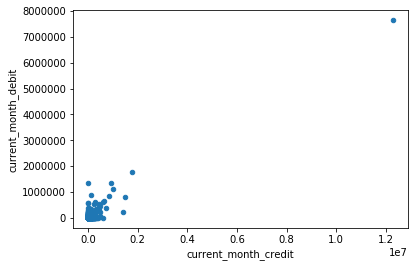

In [245]:
df.plot.scatter('current_month_credit','current_month_debit')

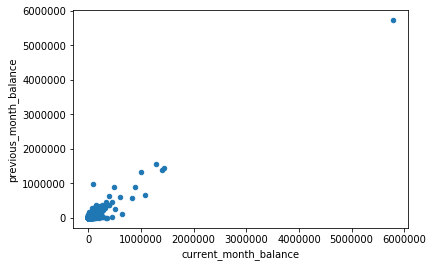

In [246]:
df.plot.scatter('current_month_balance','previous_month_balance')

In [247]:
df.corr()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
customer_id,1.000000,-0.006093,-0.000442,-0.008616,0.000743,0.009618,-0.000286,0.010267,0.006589,0.005819,0.004485,-0.002532,0.002494,-0.006414,0.002603,-0.008760,0.005140,0.004553,-0.002723
vintage,-0.006093,1.000000,0.227390,0.036987,0.044200,-0.167366,-0.380714,-0.088744,0.002986,0.004518,0.003433,0.002244,0.002848,0.028034,0.005406,0.023949,0.001638,0.003448,-0.064637
age,-0.000442,0.227390,1.000000,-0.000612,0.015439,-0.076532,-0.058990,-0.016679,0.054346,0.058342,0.061708,0.059607,0.023840,0.029961,0.027702,0.033296,0.057662,0.060297,-0.020012
dependents,-0.008616,0.036987,-0.000612,1.000000,0.001892,0.013134,0.020141,-0.079834,-0.003070,0.000216,0.001213,0.002949,0.003260,0.025054,0.008207,0.032021,-0.000652,0.001239,0.033487
city,0.000743,0.044200,0.015439,0.001892,1.000000,0.006613,-0.061234,-0.004309,-0.005654,-0.004089,-0.006298,-0.007891,0.004118,0.008087,0.001465,0.005995,-0.005796,-0.005839,-0.001585
customer_nw_category,0.009618,-0.167366,-0.076532,0.013134,0.006613,1.000000,0.235059,0.049531,-0.058314,-0.059854,-0.059535,-0.047010,-0.025254,-0.072374,-0.035917,-0.071721,-0.058648,-0.059113,0.006551
branch_code,-0.000286,-0.380714,-0.058990,0.020141,-0.061234,0.235059,1.000000,0.038708,0.000181,0.000214,0.001955,0.001310,-0.013988,-0.023849,-0.016944,-0.017584,0.001031,0.002080,0.035469
days_since_last_transaction,0.010267,-0.088744,-0.016679,-0.079834,-0.004309,0.049531,0.038708,1.000000,-0.019990,-0.014400,-0.012709,-0.006384,-0.033131,-0.071657,-0.039165,-0.070192,-0.017837,-0.011738,-0.055830
current_balance,0.006589,0.002986,0.054346,-0.003070,-0.005654,-0.058314,0.000181,-0.019990,1.000000,0.947276,0.958307,0.714600,0.030371,0.061754,0.044412,0.081247,0.983412,0.942207,-0.024181
previous_month_end_balance,0.005819,0.004518,0.058342,0.000216,-0.004089,-0.059854,0.000214,-0.014400,0.947276,1.000000,0.970530,0.722998,0.032493,0.114222,0.066329,0.109606,0.974714,0.969605,0.006886


In [248]:
df.groupby('gender')['churn'].mean()

gender
Female    0.175524
Male      0.191504
Name: churn, dtype: float64

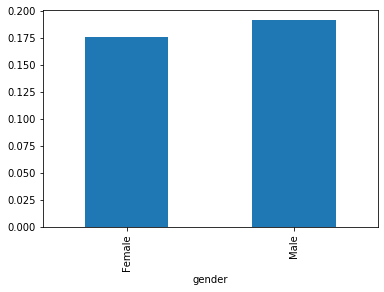

In [249]:
df.groupby('gender')['churn'].mean().plot.bar()

Text(0, 0.5, 'Churn')

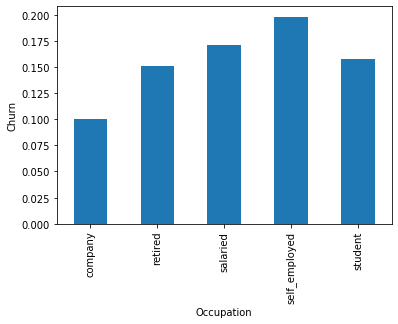

In [250]:
df.groupby('occupation')['churn'].mean().plot.bar()
plt.xlabel('Occupation')
plt.ylabel('Churn')

In [251]:
#Ttest

In [252]:
from scipy.stats import ttest_ind

In [253]:
males=df[df['gender']=='male']

In [254]:
females=df[df['gender']=='female']

In [255]:
ttest_ind(males['churn'],females['churn'],nan_policy='omit')

Ttest_indResult(statistic=nan, pvalue=nan)

In [256]:
pd.crosstab(df['occupation'],df['gender'])

gender,Female,Male
occupation,,
company,6,28
retired,389,1634
salaried,1838,4864
self_employed,8053,8911
student,1006,1052


In [257]:
#Chi-square test

In [258]:
from scipy.stats import chi2_contingency

In [259]:
chi2_contingency(pd.crosstab(df['occupation'],df['gender']))

(1263.1194370636576,
 3.29762131639299e-272,
 4,
 array([[   13.8198049 ,    20.1801951 ],
        [  822.27839171,  1200.72160829],
        [ 2724.12742522,  3977.87257478],
        [ 6895.26971671, 10068.73028329],
        [  836.50466146,  1221.49533854]]))

In [260]:
#Dropping duplicates

In [261]:
df.drop_duplicates()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,1845,10,Female,0.0,student,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,30298,4919,34,Female,0.0,self_employed,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,30299,297,47,Male,0.0,salaried,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1
28380,30300,2585,50,Male,3.0,self_employed,1219.0,3,274,NaN,...,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0


In [262]:
#Missing values

In [263]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [264]:
#Missing value treatment

In [265]:
df.dropna(axis=1,how='any')

,customer_id,vintage,age,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,2,3214,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,2,582,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,1845,10,2,1207,1076.43,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,30298,4919,34,2,223,3844.10,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,30299,297,47,2,588,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1
28380,30300,2585,50,3,274,1625.55,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0


In [266]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [267]:
#Filling

In [268]:
df['gender'].mode()

0    Male
dtype: object

In [269]:
df['gender'].fillna(value=(df['gender'].mode()[0]),inplace=True)

In [270]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                               0
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [271]:
df['occupation'].mode()

0    self_employed
dtype: object

In [272]:
df['occupation'].fillna(value=(df['occupation'].mode()[0]),inplace=True)

In [273]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                               0
dependents                        2463
occupation                           0
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [274]:
df['city'].fillna(value=(df['city'].mean()),inplace=True)

In [275]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                               0
dependents                        2463
occupation                           0
city                                 0
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [276]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.000000,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,796.109576,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.000000,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,Male,NaN,self_employed,1020.000000,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.000000,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [277]:
df['dependents'].fillna(value=(df['dependents'].mean()),inplace=True)

In [278]:
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                               0
dependents                           0
occupation                           0
city                                 0
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [279]:
df['days_since_last_transaction'].fillna(value=(df['days_since_last_transaction'].mean()),inplace=True)

In [280]:
df.isnull().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [281]:
#Outlier Treatmwent

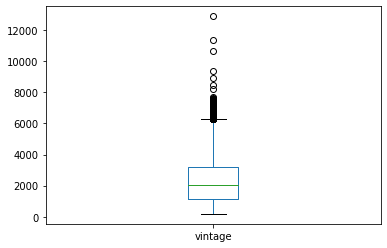

In [282]:
df['vintage'].plot.box()

In [283]:
df.loc[df['vintage']>5000,'vintage']=np.mean(df['vintage'])

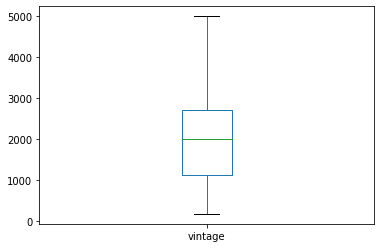

In [284]:
df['vintage'].plot.box()

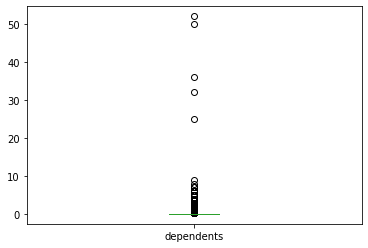

In [285]:
df['dependents'].plot.box()

In [286]:
df.loc[df['dependents']>0,'dependents']=np.mean(df['dependents'])

In [287]:
df.loc[df['dependents']<0.40,'dependents']=np.mean(df['dependents'])

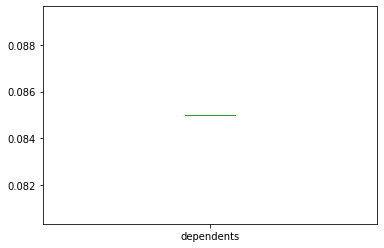

In [288]:
df['dependents'].plot.box()

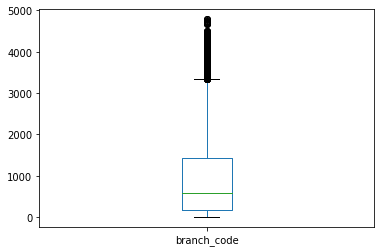

In [289]:
df['branch_code'].plot.box()

In [290]:
df.loc[df['branch_code']>3000,'branch_code']=np.mean(df['branch_code'])

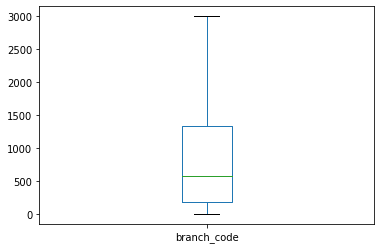

In [291]:
df['branch_code'].plot.box()

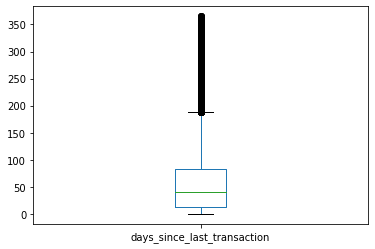

In [292]:
df['days_since_last_transaction'].plot.box()

In [293]:
df.loc[df['days_since_last_transaction']>3000,'days_since_last_transaction']=np.mean(df['days_since_last_transaction'])

In [294]:
df.loc[df['days_since_last_transaction']>200,'days_since_last_transaction']=np.mean(df['days_since_last_transaction'])

In [295]:
df.loc[df['days_since_last_transaction']>150,'days_since_last_transaction']=np.mean(df['days_since_last_transaction'])

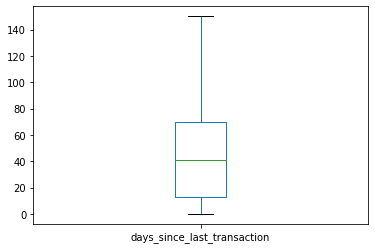

In [296]:
df['days_since_last_transaction'].plot.box()

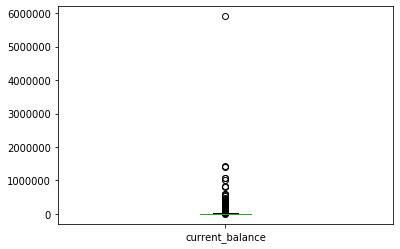

In [297]:
df['current_balance'].plot.box()

In [298]:
df.loc[df['current_balance']>1000000,'current_balance']=np.mean(df['current_balance'])

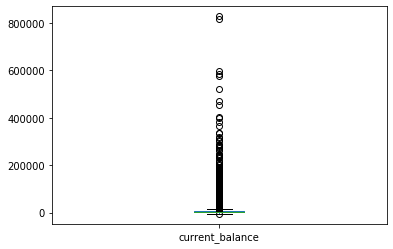

In [299]:
df['current_balance'].plot.box()

In [300]:
df.loc[df['current_balance']>9000,'current_balance']=np.mean(df['current_balance'])

In [301]:
df.loc[df['current_balance']<-2000,'current_balance']=np.mean(df['current_balance'])

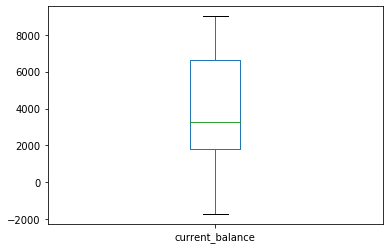

In [302]:
df['current_balance'].plot.box()

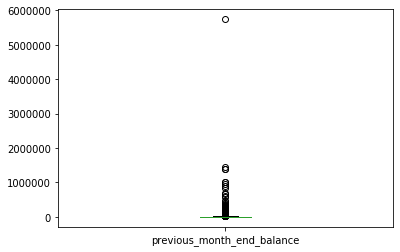

In [303]:
df['previous_month_end_balance'].plot.box()

In [304]:
df.loc[df['previous_month_end_balance']>10000,'previous_month_end_balance']=np.mean(df['previous_month_end_balance'])

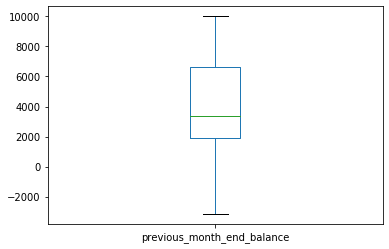

In [305]:
df['previous_month_end_balance'].plot.box()

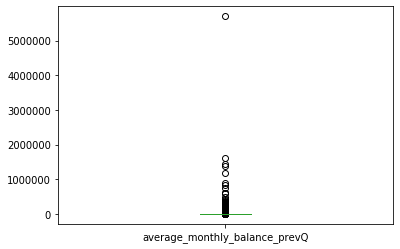

In [306]:
df['average_monthly_balance_prevQ'].plot.box()

In [307]:
df.loc[df['average_monthly_balance_prevQ']>10000,'average_monthly_balance_prevQ']=np.mean(df['average_monthly_balance_prevQ'])

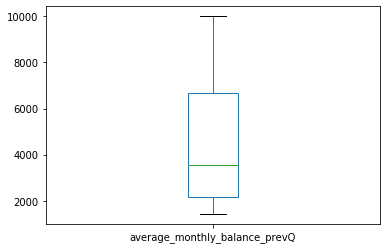

In [308]:
df['average_monthly_balance_prevQ'].plot.box()

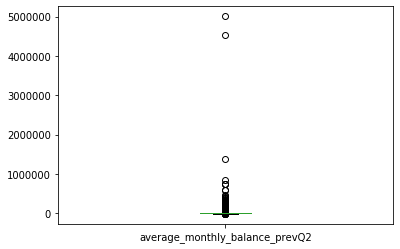

In [309]:
df['average_monthly_balance_prevQ2'].plot.box()

In [310]:
df.loc[df['average_monthly_balance_prevQ2']>10000,'average_monthly_balance_prevQ2']=np.mean(df['average_monthly_balance_prevQ2'])

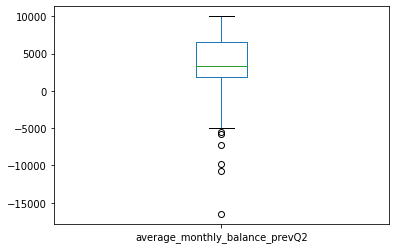

In [311]:
df['average_monthly_balance_prevQ2'].plot.box()

In [312]:
df.loc[df['average_monthly_balance_prevQ2']<-5000,'average_monthly_balance_prevQ2']=np.mean(df['average_monthly_balance_prevQ2'])

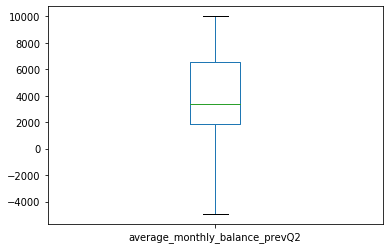

In [313]:
df['average_monthly_balance_prevQ2'].plot.box()

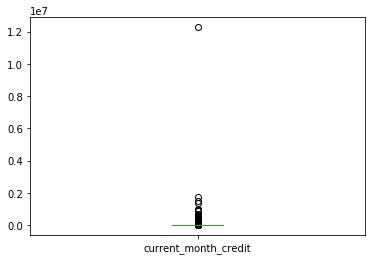

In [314]:
df['current_month_credit'].plot.box()

In [315]:
df.loc[df['current_month_credit']>0,'current_month_credit']=np.mean(df['current_month_credit'])

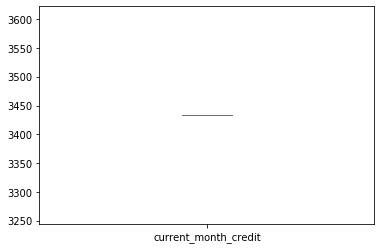

In [316]:
df['current_month_credit'].plot.box()

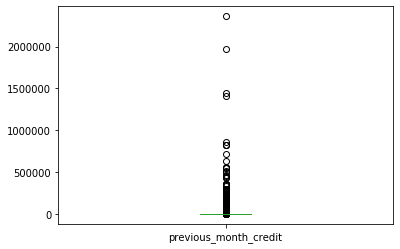

In [317]:
df['previous_month_credit'].plot.box()

In [318]:
df.loc[df['previous_month_credit']>600,'previous_month_credit']=np.mean(df['previous_month_credit'])

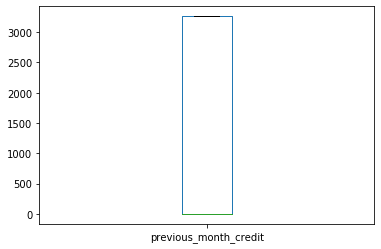

In [319]:
df['previous_month_credit'].plot.box()

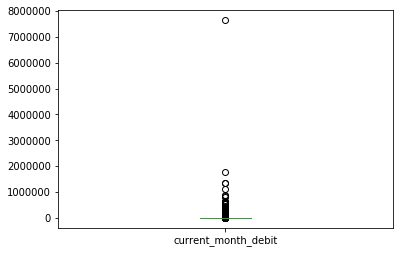

In [320]:
df['current_month_debit'].plot.box()

In [321]:
df.loc[df['current_month_debit']>10000,'current_month_debit']=np.mean(df['current_month_debit'])

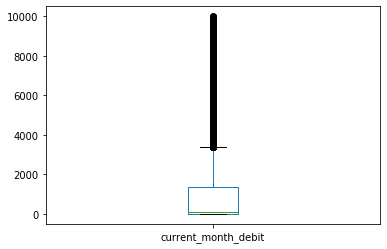

In [322]:
df['current_month_debit'].plot.box()

In [323]:
df.loc[df['current_month_debit']>3000,'current_month_debit']=np.mean(df['current_month_debit'])

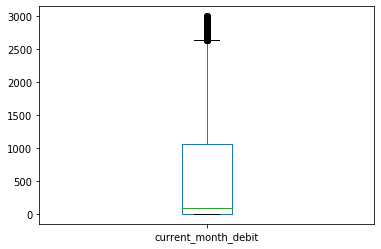

In [324]:
df['current_month_debit'].plot.box()

In [325]:
df.loc[df['current_month_debit']>2500,'current_month_debit']=np.mean(df['current_month_debit'])

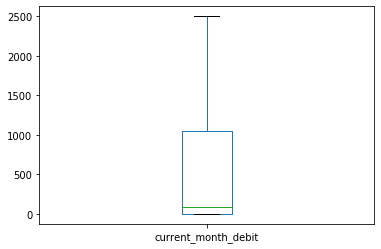

In [326]:
df['current_month_debit'].plot.box()

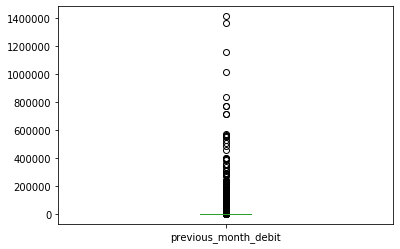

In [327]:
df['previous_month_debit'].plot.box()

In [328]:
df.loc[df['previous_month_debit']>2500,'previous_month_debit']=np.mean(df['previous_month_debit'])

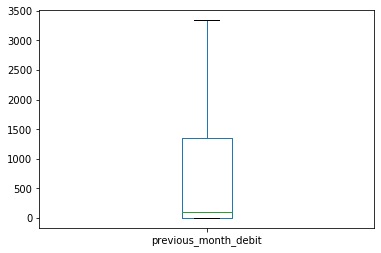

In [329]:
df['previous_month_debit'].plot.box()

In [330]:
df.loc[df['previous_month_debit']>2000,'previous_month_debit']=np.mean(df['previous_month_debit'])

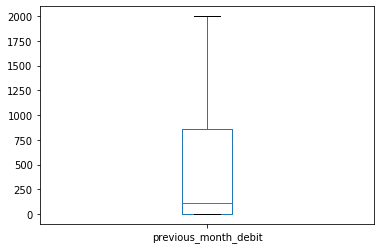

In [331]:
df['previous_month_debit'].plot.box()

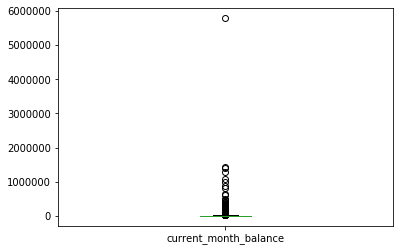

In [332]:
df['current_month_balance'].plot.box()

In [333]:
df.loc[df['current_month_balance']>2000,'current_month_balance']=np.mean(df['current_month_balance'])

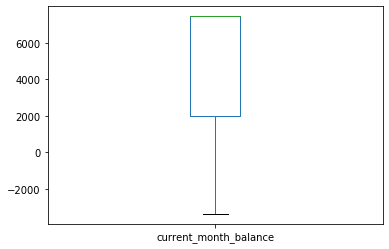

In [334]:
df['current_month_balance'].plot.box()

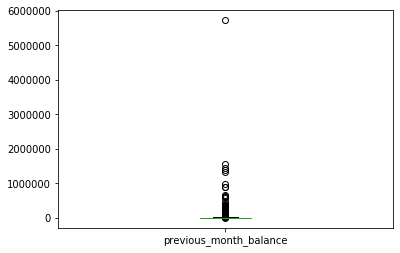

In [335]:
df['previous_month_balance'].plot.box()

In [336]:
df.loc[df['previous_month_balance']>2000,'previous_month_balance']=np.mean(df['previous_month_balance'])

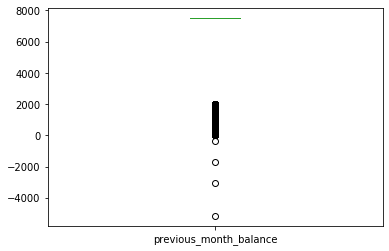

In [337]:
df['previous_month_balance'].plot.box()

In [338]:
df.loc[df['previous_month_balance']<10000,'previous_month_balance']=np.mean(df['previous_month_balance'])

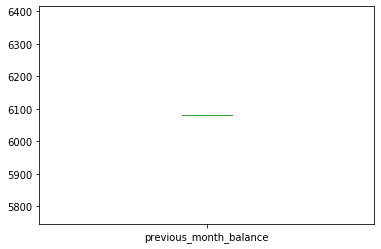

In [339]:
df['previous_month_balance'].plot.box()

In [340]:
#all the outiers have been treated

In [341]:
#KNN model

In [342]:
#KNN classification

In [343]:
df.dtypes

customer_id                         int64
vintage                           float64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                       float64
days_since_last_transaction       float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
dtype: object

In [344]:
df['gender'].value_counts()

Male      17073
Female    11309
Name: gender, dtype: int64

In [345]:
df=pd.get_dummies(df.drop(['gender'],axis=1))

In [346]:
df.head(10)

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135.000000,66,0.084992,187.000000,2,755.000000,69.997814,1458.710000,1458.710000,...,0.200000,0.200000,1458.710000,6080.760784,0,0,0,0,1,0
1,2,310.000000,35,0.084992,796.109576,2,925.975019,60.000000,5390.370000,8704.660000,...,1055.932829,100.560000,7451.132765,6080.760784,0,0,0,0,1,0
2,4,2356.000000,31,0.084992,146.000000,2,41.000000,69.997814,3913.160000,5815.290000,...,1055.932829,259.230000,7451.132765,6080.760784,0,0,0,1,0,0
3,5,478.000000,90,0.084992,1020.000000,2,582.000000,147.000000,2291.910000,2291.910000,...,0.470000,861.759827,7451.132765,6080.760784,1,0,0,0,1,0
4,6,2531.000000,42,0.084992,1494.000000,3,388.000000,58.000000,927.720000,1401.720000,...,588.620000,1538.060000,1157.150000,6080.760784,1,0,0,0,1,0
5,7,263.000000,42,0.084992,1096.000000,2,1666.000000,60.000000,6963.440429,7495.770548,...,857.500000,286.070000,7451.132765,6080.760784,0,0,0,0,1,0
6,8,2364.336446,72,0.084992,1020.000000,1,1.000000,98.000000,7006.930000,7714.190000,...,1299.640000,439.260000,7451.132765,6080.760784,0,0,1,0,0,0
7,9,1145.000000,46,0.084992,623.000000,2,317.000000,50.493696,6963.440429,8519.530000,...,443.130000,861.759827,7451.132765,6080.760784,0,0,0,0,1,0
8,10,2132.000000,31,0.084992,1096.000000,2,925.975019,19.000000,1355.860000,1355.860000,...,714.510000,359.440000,1183.450000,6080.760784,0,0,0,1,0,0
9,11,3379.000000,40,0.084992,1020.000000,2,38.000000,0.000000,4957.950000,4244.380000,...,1887.300000,1348.850000,1823.160000,6080.760784,0,0,0,0,1,0


In [347]:
df.shape

(28382, 24)

In [348]:
x = df.drop(['churn'], axis=1)
y = df['churn']
x.shape, y.shape

((28382, 23), (28382,))

In [349]:
## Importing the MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [350]:
x = pd.DataFrame(x_scaled, columns = x.columns)

In [351]:
x.head()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,0.000000,0.613071,0.730337,0.0,0.113402,0.5,0.251417,0.466652,0.296461,0.350492,...,0.000058,0.000076,0.000095,0.446443,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000033,0.026971,0.382022,0.0,0.482783,0.5,0.308428,0.400000,0.663282,0.901597,...,0.000169,0.422378,0.050284,1.000000,0.0,0.0,0.0,0.0,1.0,0.0
2,0.000099,0.451452,0.337079,0.0,0.088539,0.5,0.013338,0.466652,0.525459,0.681840,...,0.000184,0.422378,0.129632,1.000000,0.0,0.0,0.0,1.0,0.0,0.0
3,0.000132,0.061826,1.000000,0.0,0.618557,0.5,0.193731,0.980000,0.374198,0.413862,...,0.000141,0.000184,0.430948,1.000000,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000165,0.487759,0.460674,0.0,0.906004,1.0,0.129043,0.386667,0.246920,0.346157,...,1.000000,0.235449,0.769156,0.418587,0.0,0.0,0.0,0.0,1.0,0.0


In [352]:
x.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
count,28382.000000,28382.000000,28382.000000,28382.0,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,...,28382.000000,28382.000000,28382.000000,28382.000000,28382.0,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000
mean,0.499753,0.390002,0.530431,0.0,0.482783,0.612765,0.276635,0.296687,0.518910,0.548678,...,0.290115,0.178936,0.195726,0.858642,0.0,0.001409,0.071313,0.236206,0.618561,0.072511
std,0.288662,0.245792,0.200080,0.0,0.258766,0.330222,0.259401,0.231779,0.225773,0.194774,...,0.442309,0.232200,0.238761,0.245563,0.0,0.037515,0.257351,0.424758,0.485748,0.259336
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249381,0.195228,0.393258,0.0,0.248029,0.500000,0.058353,0.086667,0.326920,0.384511,...,0.000098,0.000160,0.000200,0.496147,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.499983,0.381328,0.505618,0.0,0.505761,0.500000,0.190397,0.273333,0.466628,0.496613,...,0.000190,0.036769,0.054984,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.749365,0.527178,0.662921,0.0,0.664645,1.000000,0.446816,0.466652,0.779482,0.745823,...,1.000000,0.422378,0.430948,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [353]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56, stratify=y)

In [354]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [355]:
def Elbow(K):
    #initiating empty list
    test_error = []
   
    #training model for evey value of K
    for i in K:
        #Instance oh KNN
        clf = KNN(n_neighbors = i)
        clf.fit(train_x, train_y)
        # Appending F1 scores to empty list claculated using the predictions
        tmp = clf.predict(test_x)
        tmp = f1_score(tmp,test_y)
        error = 1-tmp
        test_error.append(error)
    
    return test_error

In [356]:
#Defining K range
k = range(1, 6, 2)

In [357]:
# calling above defined function
test = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

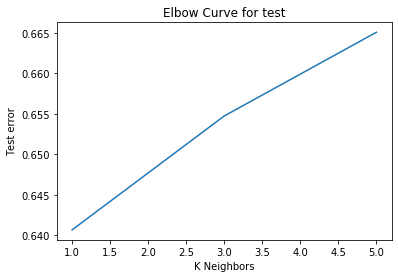

In [358]:
# plotting the Curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test error')
plt.title('Elbow Curve for test')

In [359]:
# Creating instance of KNN
clf = KNN(n_neighbors = 1)

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test F1 Score    ', k )

Test F1 Score     0.35933033891384236


In [360]:
#importing KNN classifier and metric F1score
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [361]:
# Creating instance of KNN
clf = KNN(n_neighbors = 3)

# Fitting the model
clf.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
train_predict = clf.predict(train_x)
k = f1_score(train_predict, train_y)
print('Training F1 Score', k )

# Predicting over the Train Set and calculating F1
test_predict = clf.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test F1 Score    ', k )

Training F1 Score 0.6054637865311309
Test F1 Score     0.345273631840796


In [362]:
from sklearn.metrics import mean_squared_error as mse

In [363]:
df.head()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135.0,66,0.084992,187.000000,2,755.000000,69.997814,1458.71,1458.71,...,0.200000,0.200000,1458.710000,6080.760784,0,0,0,0,1,0
1,2,310.0,35,0.084992,796.109576,2,925.975019,60.000000,5390.37,8704.66,...,1055.932829,100.560000,7451.132765,6080.760784,0,0,0,0,1,0
2,4,2356.0,31,0.084992,146.000000,2,41.000000,69.997814,3913.16,5815.29,...,1055.932829,259.230000,7451.132765,6080.760784,0,0,0,1,0,0
3,5,478.0,90,0.084992,1020.000000,2,582.000000,147.000000,2291.91,2291.91,...,0.470000,861.759827,7451.132765,6080.760784,1,0,0,0,1,0
4,6,2531.0,42,0.084992,1494.000000,3,388.000000,58.000000,927.72,1401.72,...,588.620000,1538.060000,1157.150000,6080.760784,1,0,0,0,1,0


In [364]:
df.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
count,28382.000000,28382.000000,28382.000000,2.838200e+04,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,...,28382.000000,28382.000000,28382.000000,2.838200e+04,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000,28382.000000
mean,15143.508667,2059.811174,48.208336,8.499210e-02,796.109576,2.225530,830.629312,44.503080,3842.960803,4064.475374,...,447.342189,391.395534,5920.893344,6.080761e+03,0.185329,0.001409,0.071313,0.236206,0.618561,0.072511
std,8746.454456,1184.719803,17.807163,3.942749e-14,426.704413,0.660443,777.943455,34.766815,2419.877645,2560.899555,...,580.488741,477.440136,2658.294720,1.983643e-09,0.388571,0.037515,0.257351,0.424758,0.485748,0.259336
min,1.000000,180.000000,1.000000,8.499210e-02,0.000000,1.000000,1.000000,0.000000,-1718.820000,-3149.570000,...,0.010000,0.010000,-3374.180000,6.080761e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7557.250000,1121.000000,36.000000,8.499210e-02,409.000000,2.000000,176.000000,13.000000,1785.172500,1906.000000,...,0.410000,0.410000,1996.765000,6.080761e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15150.500000,2018.000000,46.000000,8.499210e-02,834.000000,2.000000,572.000000,41.000000,3282.595000,3379.915000,...,91.930000,109.960000,7451.132765,6.080761e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,22706.750000,2721.000000,60.000000,8.499210e-02,1096.000000,3.000000,1341.000000,69.997814,6635.820000,6656.535000,...,1055.932829,861.759827,7451.132765,6.080761e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,30301.000000,5000.000000,90.000000,8.499210e-02,1649.000000,3.000000,3000.000000,150.000000,8999.380000,9998.470000,...,2499.960000,1999.670000,7451.132765,6.080761e+03,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [365]:
#linear regression

In [366]:
#seperating independent and dependent variables
x = df.drop(['churn'], axis=1)
y = df['churn']
x.shape, y.shape

((28382, 23), (28382,))

In [367]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

In [368]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

In [369]:
# Creating instance of Linear Regresssion
lr = LR()

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [370]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 0.2495807201623053


In [371]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     0.2487110308488703


In [372]:
lr.coef_

array([ 2.59793023e-07, -1.21219443e-05, -3.60225825e-04, -1.93286142e-16,
       -1.05722247e-06,  2.85394077e-03,  1.33074085e-05, -1.74646644e-05,
       -8.39938079e-05, -7.14798904e-06,  9.49017094e-05, -1.68839053e-05,
        3.36102673e-18,  2.15173343e-06,  8.55317691e-05,  4.75076977e-05,
       -1.48842131e-05, -6.07153217e-18, -1.33559723e-02,  2.85023494e-05,
       -5.78821532e-03,  2.25901501e-02, -3.47446483e-03])

Text(0.5, 1.0, 'Coefficient plot')

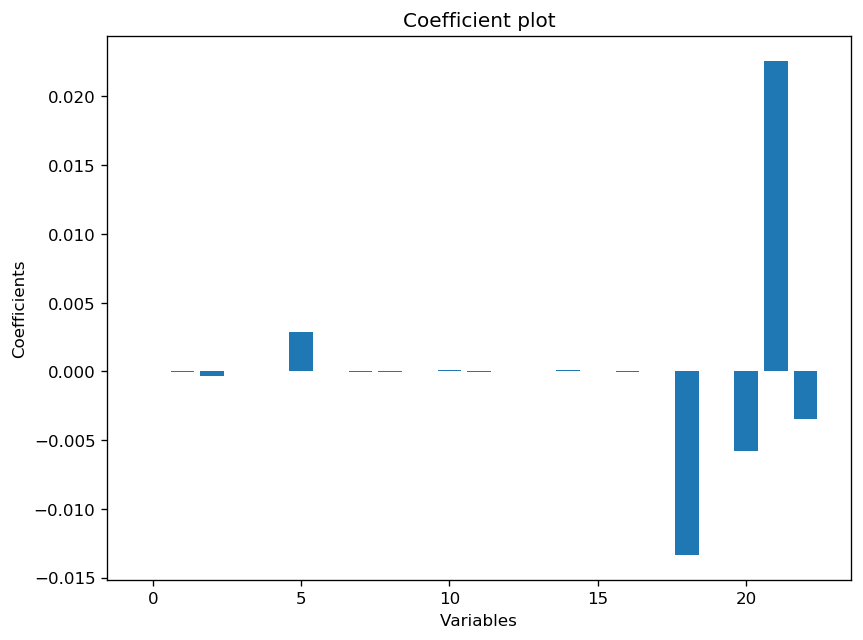

In [373]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

In [374]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : test_y,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
10054,0,0.084965,-0.084965
20948,0,0.039263,-0.039263
14688,0,0.149922,-0.149922
4562,1,0.748625,0.251375
18664,0,0.385271,-0.385271


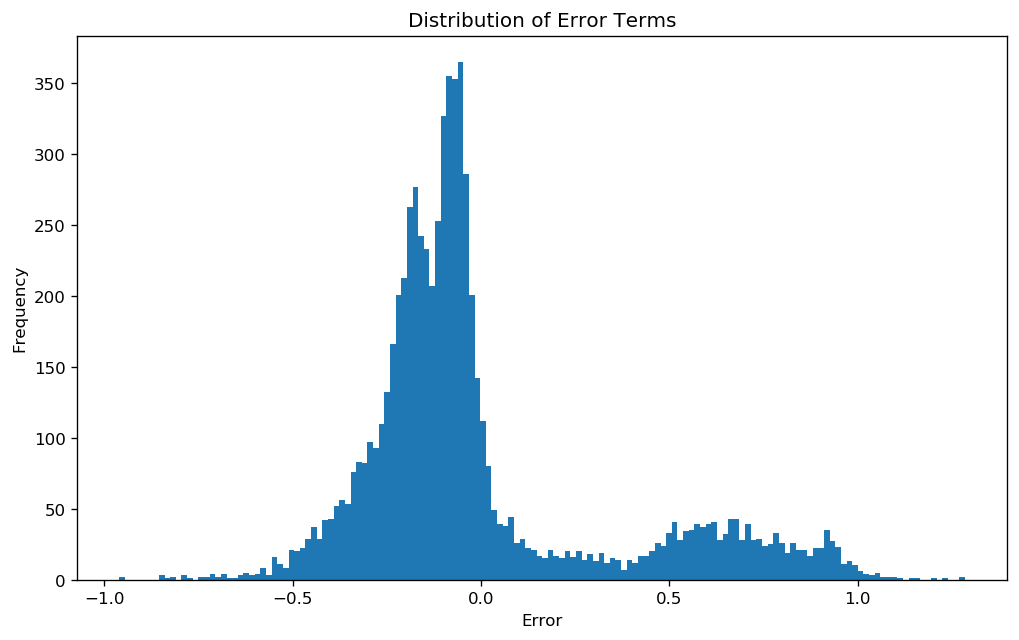

In [375]:
# Histogram for distribution
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

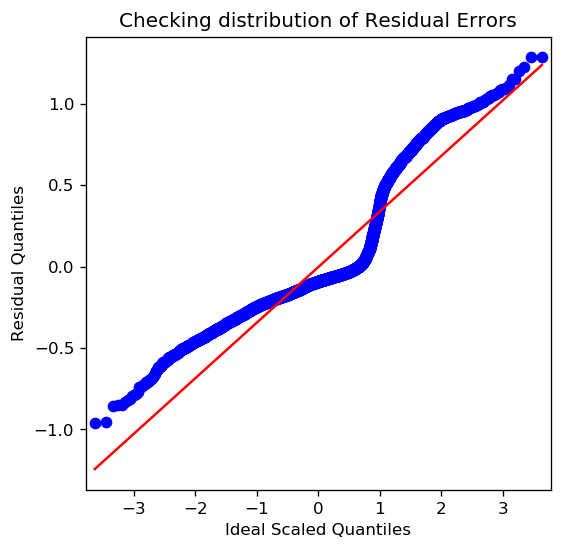

In [376]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

In [377]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculating VIF for every column (only works for the not Catagorical)
VIF = pd.Series([variance_inflation_factor(df.values, i) for i in range(df.shape[1])], index =df.columns)
VIF

customer_id                       1.000447
vintage                           1.188704
age                               1.583146
dependents                        0.002199
city                              1.004625
customer_nw_category              1.141274
branch_code                       1.215212
days_since_last_transaction       1.381252
current_balance                   3.437880
previous_month_end_balance        4.088065
average_monthly_balance_prevQ     5.679103
average_monthly_balance_prevQ2    2.126085
current_month_credit              0.009594
previous_month_credit             1.427834
current_month_debit               1.378098
previous_month_debit              1.403809
current_month_balance             1.695388
previous_month_balance            0.014437
churn                             1.280476
occupation_company                     inf
occupation_retired                     inf
occupation_salaried                    inf
occupation_self_employed               inf
occupation_

In [378]:
# Creating instance of Linear Regresssion
lr = LR(normalize = True)

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [379]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y)
print('Training Mean Absolute Error', k )

Training Mean Absolute Error 0.24958072016230556


In [380]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y)
print('Test Mean Absolute Error    ', k )

Test Mean Absolute Error     0.24871103084887058


Text(0.5, 1.0, 'Normalized Coefficient plot')

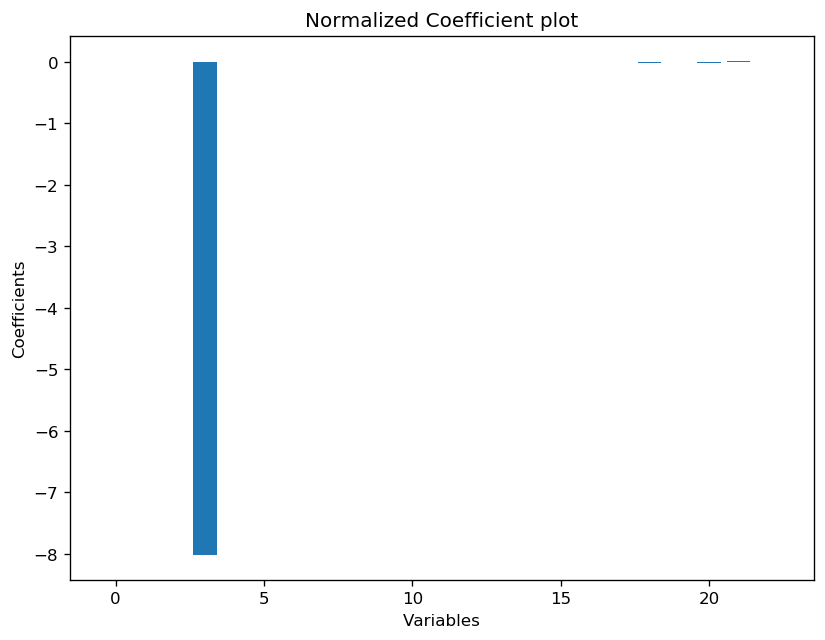

In [381]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(train_x.columns))
y = lr.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')

In [382]:
#Logistic regression

In [383]:
#seperating independent and dependent variables
x = df.drop(['churn'], axis=1)
y = df['churn']
x.shape, y.shape

((28382, 23), (28382,))

In [384]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

In [385]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [386]:
cols = train_x.columns
cols

Index(['customer_id', 'vintage', 'age', 'dependents', 'city',
       'customer_nw_category', 'branch_code', 'days_since_last_transaction',
       'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance', 'occupation_company', 'occupation_retired',
       'occupation_salaried', 'occupation_self_employed',
       'occupation_student'],
      dtype='object')

In [387]:
train_x_scaled = scaler.fit_transform(train_x)
train_x_scaled = pd.DataFrame(train_x_scaled, columns=cols)
train_x_scaled.head()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,0.382983,0.193154,0.348315,0.0,0.378034,1.0,0.796599,0.060000,0.948697,0.861989,...,0.000181,0.161955,0.192803,1.000000,0.0,0.0,0.0,1.0,0.0,0.0
1,0.140731,0.352282,0.516854,0.0,0.009102,1.0,0.318439,0.180000,0.145148,0.245878,...,1.000000,0.171463,0.000040,0.368693,0.0,0.0,0.0,0.0,1.0,0.0
2,0.018218,0.406432,0.808989,0.0,0.618932,1.0,0.371124,0.466652,0.408964,0.402574,...,0.000190,0.143107,0.022734,1.000000,0.0,0.0,1.0,0.0,0.0,0.0
3,0.943992,0.477386,0.258427,0.0,0.906553,1.0,0.335779,0.533333,0.295042,0.379832,...,0.000006,0.000008,0.000010,0.482079,0.0,0.0,0.0,0.0,0.0,1.0
4,0.554441,0.920539,0.494382,0.0,0.665049,0.0,0.030343,0.073333,0.799441,0.809652,...,1.000000,0.422378,0.430948,1.000000,0.0,0.0,0.0,1.0,0.0,0.0


In [388]:
test_x_scaled = scaler.transform(test_x)
test_x_scaled = pd.DataFrame(test_x_scaled, columns=cols)
test_x_scaled.head()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,days_since_last_transaction,current_balance,previous_month_end_balance,...,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,0.354038,0.782988,0.516854,0.0,0.747573,0.5,0.034011,0.040000,0.381810,0.416057,...,0.000009,0.116410,0.719007,1.000000,0.0,0.0,0.0,1.0,0.0,0.0
1,0.737483,0.574689,0.337079,0.0,0.665049,0.5,0.029343,0.413333,0.636906,0.643708,...,0.000049,0.000064,0.000080,1.000000,0.0,0.0,0.0,0.0,1.0,0.0
2,0.517410,0.560996,0.629213,0.0,0.374393,0.5,0.076025,0.826667,0.292040,0.381325,...,0.000169,0.009876,0.005701,0.480527,0.0,0.0,0.0,0.0,1.0,0.0
3,0.160071,0.124481,0.269663,0.0,0.618932,1.0,0.368123,0.506667,0.129965,0.252413,...,0.000147,0.000192,0.000240,0.327321,0.0,0.0,0.0,0.0,1.0,0.0
4,0.657315,0.532988,0.853933,0.0,0.248180,1.0,0.109370,0.466652,0.174198,0.285795,...,0.000067,0.000088,0.430948,0.368266,0.0,0.0,1.0,0.0,0.0,0.0


In [389]:
#importing Logistic Regression and metric F1-score
from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.metrics import f1_score

In [390]:
# Creating instance of Logistic Regresssion
logreg = LogReg()

# Fitting the model
logreg.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [391]:
# Predicting over the Train
train_predict = logreg.predict(train_x)
train_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [392]:
# Calculating f1-score
k = f1_score(train_predict, train_y)
print('Training f1_score', k )

Training f1_score 0.44636678200692037


In [393]:
# Predicting
test_predict = logreg.predict(test_x)
k = f1_score(test_predict, test_y)
print('Test f1_score    ', k )

Test f1_score     0.4519180241723594


In [394]:
# Predicting
train_predict = logreg.predict_proba(train_x)
train_predict

array([[0.92796979, 0.07203021],
       [0.67073976, 0.32926024],
       [0.93973436, 0.06026564],
       ...,
       [0.96926944, 0.03073056],
       [0.9862817 , 0.0137183 ],
       [0.8658063 , 0.1341937 ]])

In [395]:
train_preds = train_predict[:,1]
train_preds

array([0.07203021, 0.32926024, 0.06026564, ..., 0.03073056, 0.0137183 ,
       0.1341937 ])

In [396]:
for i in range(0, len(train_preds)):
  if(train_preds[i]>0.55):
    train_preds[i] = 1
  else:
    train_preds[i] = 0
  

In [397]:
# Calculating f1-score
k = f1_score(train_preds, train_y)
print('Training f1_score', k )

Training f1_score 0.401987852015461


In [398]:
#Decision Tree

In [399]:
#seperating independent and dependent variables
y = df['churn']
X = df.drop(['churn'], axis=1)

In [400]:
#creating the train and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 101, stratify=y, test_size=0.25)

In [401]:
# distribution in training set
y_train.value_counts(normalize=True)

0    0.814667
1    0.185333
Name: churn, dtype: float64

In [402]:
# distribution in validation set
y_valid.value_counts(normalize=True)

0    0.814684
1    0.185316
Name: churn, dtype: float64

In [403]:
#shape of training set
X_train.shape, y_train.shape

((21286, 23), (21286,))

In [404]:
#shape of validation set
X_valid.shape, y_valid.shape

((7096, 23), (7096,))

In [405]:
#importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

In [406]:
#creating the decision tree function
dt_model = DecisionTreeClassifier(random_state=10)

In [407]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [408]:
#Training score
dt_model.score(X_train, y_train)

1.0

In [409]:
#Validation score
dt_model.score(X_valid, y_valid)

0.7846674182638106

In [410]:
#predictions on validation set
dt_model.predict(X_valid)

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [411]:
dt_model.predict_proba(X_valid)

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [412]:
y_pred = dt_model.predict_proba(X_valid)[:,1]

In [413]:
y_new = []
for i in range(len(y_pred)):
    if y_pred[i]<=0.7:
        y_new.append(0)
    else:
        y_new.append(1)

In [414]:
from sklearn.metrics import accuracy_score

In [415]:
accuracy_score(y_valid, y_new)

0.7846674182638106

In [416]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    validation_accuracy.append(dt_model.score(X_valid, y_valid))

In [417]:
frame = pd.DataFrame({'max_depth':range(1,10), 'train_acc':train_accuracy, 'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.845250,0.847802
1,2,0.845250,0.847802
2,3,0.851217,0.851888
3,4,0.855586,0.855271
4,5,0.859626,0.857384


No handles with labels found to put in legend.


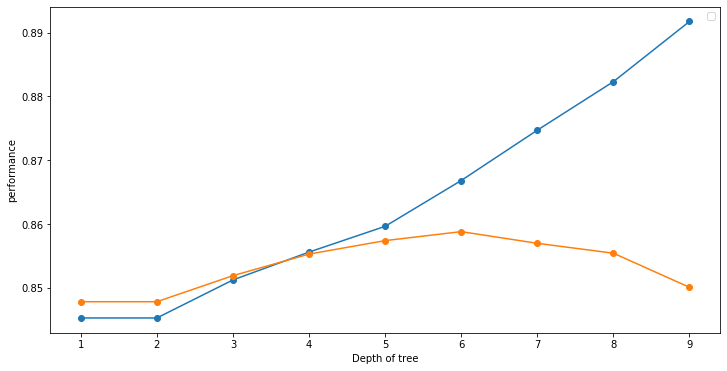

In [418]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

In [419]:
dt_model = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=25, random_state=10)

In [420]:
#fitting the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=25,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [421]:
#Training score
dt_model.score(X_train, y_train)

0.8555858310626703

In [422]:
#Validation score
dt_model.score(X_valid, y_valid)

0.8552705749718151

In [423]:
#MANAK SINHA